In [90]:
from comp5318_assignment1 import models, model_tools, decomposition
import operator as op
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [104]:
mr = model_tools.ModelRunner(models.KNN(6, distancefunction='manhatten'))
res = mr.run()
print(ytr)

KeyboardInterrupt: 

In [2]:
predictors = [models.GNB]
ks = [6, 51, 101, 201]

for d in ['euclidian', 'manhatten', 'cosine']:
    predictors.append(lambda : models.KNN(k=1, distancefunction=d, weigh_voting=True))
    predictors[-1].is_knn = True
    

reductions = [
    None,
    decomposition.PCA(64, normalize=False),
    decomposition.PCA(105, normalize=False),
    decomposition.NMF(50)
]

models_to_test = []
for red in reductions:
    for pred in predictors:
        if red is None:
            models_to_test.append(pred())
        else:
            models_to_test.append(
                model_tools.Pipeline(
                    [
                        (str(red), red),
                        (str(pred()), pred())
                    ]
                )
            )
print(*map(str, models_to_test), sep='\n')
print(len(models_to_test))
for m in models_to_test:
    m.is_knn = 'KNN' in str(m)

GNB()
KNN(k=1, distancefunction=cosine)
KNN(k=1, distancefunction=cosine)
KNN(k=1, distancefunction=cosine)
Pipeline(PCA(64, False), GNB())
Pipeline(PCA(64, False), KNN(k=1, distancefunction=cosine))
Pipeline(PCA(64, False), KNN(k=1, distancefunction=cosine))
Pipeline(PCA(64, False), KNN(k=1, distancefunction=cosine))
Pipeline(PCA(105, False), GNB())
Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine))
Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine))
Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine))
Pipeline(NMF(50), GNB())
Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))
Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))
Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))
16


In [3]:
mr = model_tools.ModelRunner()
mr.load_data()
xtr, ytr, xte, yte = mr.xtr, mr.ytr, mr.xte, mr.yte

ks = 2 ** np.arange(8) + 1

res = []
for model in models_to_test:
    print(f'training {model}')
    model.fit(xtr, ytr)
    
for model in models_to_test:
    if model.is_knn:  # for knns, run with multiple ks (but save distances to save time)
        k = ks[0]
        print(f'predicting {model} with k={k}')
        model.fit(xtr, ytr)
        # first k
        dists, preds = model.predict(xte, k=k, return_dists=True)
        res.append(dict(
            modelname=str(model),
            accuracy=np.mean(yte == preds),
            k=1
        ))
        print(res[-1])
        for k in ks[1:]:
            print(f'predicting {model} with k={k}')
            preds = model.predict(xte, k=k, dists=dists)
            res.append(dict(
                modelname=str(model) + '(different-k)',
                k=k,
                accuracy=np.mean(yte == preds),
            ))
            print(res[-1])
    else:  # not a knn model
        print(f'predicting {model}')
        res.append(dict(
            modelname=str(model),
            accuracy=np.mean(yte == model.predict(xte))
        ))
        print(res[-1])

training GNB()
training KNN(k=1, distancefunction=cosine)
training KNN(k=1, distancefunction=cosine)
training KNN(k=1, distancefunction=cosine)
training Pipeline(PCA(64, False), GNB())
training Pipeline(PCA(64, False), KNN(k=1, distancefunction=cosine))
training Pipeline(PCA(64, False), KNN(k=1, distancefunction=cosine))
training Pipeline(PCA(64, False), KNN(k=1, distancefunction=cosine))
training Pipeline(PCA(105, False), GNB())
training Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine))
training Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine))
training Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine))
training Pipeline(NMF(50), GNB())
training Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))
training Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))
training Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))
predicting GNB()


/home/alexe/Documents/Uni/2020-2/ml-5318/assignment_1/comp5318_assignment1/models.py:76: RuntimeWarning: divide by zero encountered in log
  conditionalprobs = np.sum(np.log(ind_probs), axis=1)


{'modelname': 'GNB()', 'accuracy': 0.6195}
predicting KNN(k=1, distancefunction=cosine) with k=2
{'modelname': 'KNN(k=1, distancefunction=cosine)', 'accuracy': 0.8305, 'k': 1}
predicting KNN(k=1, distancefunction=cosine) with k=3
{'modelname': 'KNN(k=1, distancefunction=cosine)(different-k)', 'k': 3, 'accuracy': 0.8455}
predicting KNN(k=1, distancefunction=cosine) with k=5
{'modelname': 'KNN(k=1, distancefunction=cosine)(different-k)', 'k': 5, 'accuracy': 0.841}
predicting KNN(k=1, distancefunction=cosine) with k=9
{'modelname': 'KNN(k=1, distancefunction=cosine)(different-k)', 'k': 9, 'accuracy': 0.8335}
predicting KNN(k=1, distancefunction=cosine) with k=17
{'modelname': 'KNN(k=1, distancefunction=cosine)(different-k)', 'k': 17, 'accuracy': 0.828}
predicting KNN(k=1, distancefunction=cosine) with k=33
{'modelname': 'KNN(k=1, distancefunction=cosine)(different-k)', 'k': 33, 'accuracy': 0.8155}
predicting KNN(k=1, distancefunction=cosine) with k=65
{'modelname': 'KNN(k=1, distancefunct

{'modelname': 'Pipeline(PCA(64, False), KNN(k=1, distancefunction=cosine))(different-k)', 'k': 129, 'accuracy': 0.806}
predicting Pipeline(PCA(105, False), GNB())
{'modelname': 'Pipeline(PCA(105, False), GNB())', 'accuracy': 0.753}
predicting Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine)) with k=2
{'modelname': 'Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine))', 'accuracy': 0.8405, 'k': 1}
predicting Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine)) with k=3
{'modelname': 'Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine))(different-k)', 'k': 3, 'accuracy': 0.8485}
predicting Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine)) with k=5
{'modelname': 'Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine))(different-k)', 'k': 5, 'accuracy': 0.842}
predicting Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine)) with k=9
{'modelname': 'Pipeline(PCA(105, False), KNN(k=1, distancefunction=cosine))(different-k)', 'k': 9, 'a

{'modelname': 'Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))(different-k)', 'k': 3, 'accuracy': 0.809}
predicting Pipeline(NMF(50), KNN(k=1, distancefunction=cosine)) with k=5
{'modelname': 'Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))(different-k)', 'k': 5, 'accuracy': 0.8075}
predicting Pipeline(NMF(50), KNN(k=1, distancefunction=cosine)) with k=9
{'modelname': 'Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))(different-k)', 'k': 9, 'accuracy': 0.804}
predicting Pipeline(NMF(50), KNN(k=1, distancefunction=cosine)) with k=17
{'modelname': 'Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))(different-k)', 'k': 17, 'accuracy': 0.795}
predicting Pipeline(NMF(50), KNN(k=1, distancefunction=cosine)) with k=33
{'modelname': 'Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))(different-k)', 'k': 33, 'accuracy': 0.7795}
predicting Pipeline(NMF(50), KNN(k=1, distancefunction=cosine)) with k=65
{'modelname': 'Pipeline(NMF(50), KNN(k=1, distancefunction=cosine))(different-

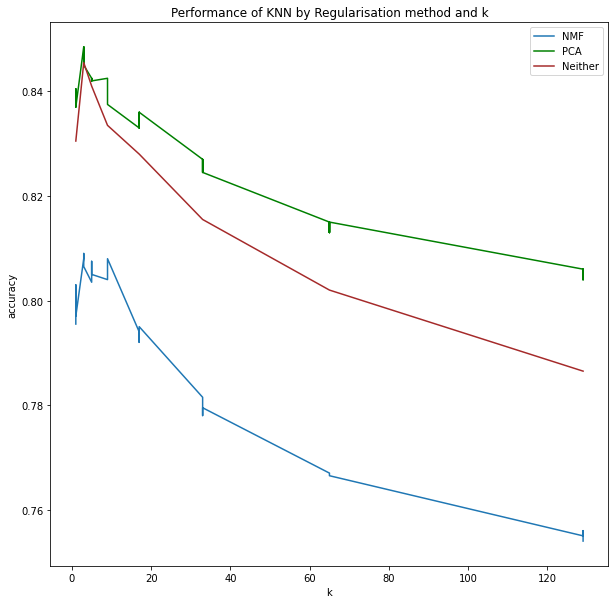

In [54]:
df = pd.DataFrame(res)
df['redtype'] = list(map(lambda x: 'NMF' if 'NMF' in x else ('PCA' if "PCA" in x else ''), df['modelname']))
import seaborn as sns
ax = df[df['redtype'] == 'NMF'].sort_values('k').plot('k', 'accuracy', kind='line', label='NMF', title='Performance of KNN by Regularisation method and k', figsize=(10, 10), ylabel='accuracy')
df[df['redtype'] == 'PCA'].sort_values('k').plot('k', 'accuracy', ax=ax, kind='line', label='PCA', color='green')
df[df['redtype'] == ''].sort_values('k').plot('k', 'accuracy', ax=ax, kind='line', label='Neither', color='brown')
plt.show()

<ipython-input-103-ee8d93423826>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCAs['components'] = list(map(pca_components, PCAs['modelname']))


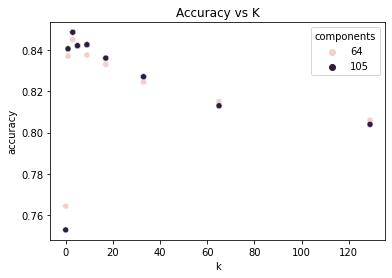

In [103]:
import re
def pca_components(s):
    m = re.search(r'PCA\((\d+)', s).group(1)
    return int(m)

PCAs['components'] = list(map(pca_components, PCAs['modelname']))


In [109]:
pred = models_to_test[0].predict(xte)
from comp5318_assignment1.model_tools import confusion_matrix, plot_confusion_matrix
plot_confuconfusion_matrix(pred, yte)

ImportError: cannot import name 'plot_confusion_matrix' from 'comp5318_assignment1.model_tools' (/home/alexe/Documents/Uni/2020-2/ml-5318/assignment_1/comp5318_assignment1/model_tools.py)

In [118]:
run_models = []
for comp in [54, 60, 64, 70, 80, 100, 200]:
    run_models.append(
        model_tools.Pipeline(
            [
                (f'pca{comp}', decomposition.PCA(comp)),
                (f'KNN(6)', models.KNN(6, weigh_voting=True, distancefunction='manhatten'))
            ]
        )
    )
mr = model_tools.ModelRunner(*run_models)
mr.run(verbose=True)

running Pipeline(pca54, KNN(6))
Pipeline(pca54, KNN(6)) got (0.843,)
running Pipeline(pca60, KNN(6))
Pipeline(pca60, KNN(6)) got (0.838,)
running Pipeline(pca64, KNN(6))
Pipeline(pca64, KNN(6)) got (0.8445,)
running Pipeline(pca70, KNN(6))
Pipeline(pca70, KNN(6)) got (0.8435,)
running Pipeline(pca80, KNN(6))
Pipeline(pca80, KNN(6)) got (0.836,)
running Pipeline(pca100, KNN(6))
Pipeline(pca100, KNN(6)) got (0.848,)
running Pipeline(pca200, KNN(6))
Pipeline(pca200, KNN(6)) got (0.8405,)


{'Pipeline(pca54, KNN(6))': (0.843,),
 'Pipeline(pca60, KNN(6))': (0.838,),
 'Pipeline(pca64, KNN(6))': (0.8445,),
 'Pipeline(pca70, KNN(6))': (0.8435,),
 'Pipeline(pca80, KNN(6))': (0.836,),
 'Pipeline(pca100, KNN(6))': (0.848,),
 'Pipeline(pca200, KNN(6))': (0.8405,)}

In [119]:
for dist in ['manhatten', 'euclidian', 'cosine']:
    print(dist)
    mr = model_tools.ModelRunner(
        model_tools.Pipeline([
            ('pca64', decomposition.PCA(64, normalize=False)),
            ('knn' + dist, models.KNN(6, weigh_voting=True, distancefunction=dist))
        ])
    )
    print(mr.run())

manhatten
{'Pipeline(pca64, knnmanhatten)': (0.8455,)}
euclidian
{'Pipeline(pca64, knneuclidian)': (0.833,)}
cosine
{'Pipeline(pca64, knncosine)': (0.848,)}
